<a href="https://colab.research.google.com/github/ShreyaTripathi1/SLP-MLP-on-Iris-Dataset/blob/main/Implementation_of_SLP_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single Layer Perceptron**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Load Dataset
data = pd.read_csv('iris.csv')
data.columns = ['Sepal_len_cm', 'Sepal_wid_cm', 'Petal_len_cm', 'Petal_wid_cm', 'Type']
data.head(10)

,Sepal_len_cm,Sepal_wid_cm,Petal_len_cm,Petal_wid_cm,Type
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
5,4.6,3.4,1.4,0.3,0
6,5.0,3.4,1.5,0.2,0
7,4.4,2.9,1.4,0.2,0
8,4.9,3.1,1.5,0.1,0
9,5.4,3.7,1.5,0.2,0


# Checking Dataset Balance
A balanced dataset means the classes (labels) are distributed evenly. In an imbalanced dataset, one class might dominate over others, leading to biased predictions.

Steps to Check Dataset Balance:
- Class Distribution: Look at the count of each class to see if they are roughly equal.
- Visualization: Visualize the class distribution using a bar chart or pie chart.

In [56]:
# Checking the balance of the dataset
# Count class distribution
class_counts = data['Type'].value_counts()
print("Class distribution:\n", class_counts)


Class distribution:
 Type
-1    50
 1    50
 0    49
Name: count, dtype: int64


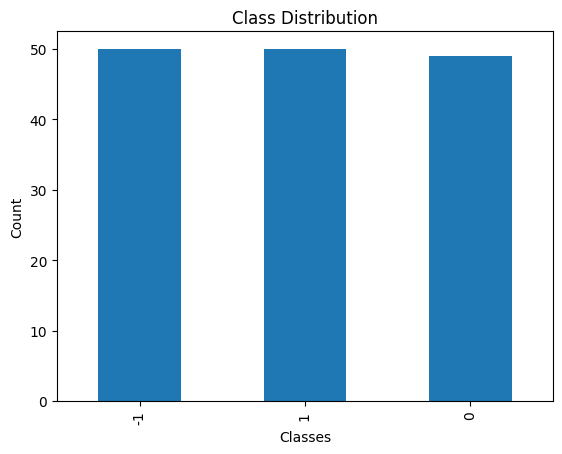

In [57]:
# Plot class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Training
Actiavation function used : Sigmoid function

In [58]:
# Sigmoid Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [59]:
# Perceptron Training Function
def perceptron_train(in_data, labels, alpha, epochs=100):
    X = np.array(in_data)
    y = np.array(labels)

    # Initialize weights and bias randomly
    weights = np.random.random(X.shape[1])
    bias = np.random.random_sample()

    for epoch in range(epochs):
        for key in range(X.shape[0]):
            # Calculate activation (weighted sum of inputs + bias)
            net_input = np.dot(X[key], weights) + bias
            a = sigmoid(net_input)  # Sigmoid activation function

            # Convert to binary output
            yn = 1 if a >= 0.5 else 0  # Threshold is 0.5 for sigmoid

            # Update weights and bias based on error
            error = y[key] - yn
            weights += alpha * error * X[key]
            bias += alpha * error

        print(f'Epoch {epoch+1}/{epochs}: Weights - {weights}, Bias - {bias}')

    return weights, bias

In [60]:
# Perceptron Testing Function
def perceptron_test(in_data, weights, bias):
    X = np.array(in_data)
    predictions = []

    for key in range(X.shape[0]):
        net_input = np.dot(X[key], weights) + bias
        a = sigmoid(net_input)
        yn = 1 if a >= 0.5 else 0  # Output is binary
        predictions.append(yn)
    return np.array(predictions)


## Scoring the function

In [61]:
# Scoring Function
def score(result, labels):
    correct_ctr = np.sum(result == labels)  # Count correct predictions
    score = correct_ctr * 100 / len(labels)  # Accuracy percentage
    print('Accuracy: {:.2f}%'.format(score))


## Training

In [62]:
# Data Preprocessing
# Dividing d_train into data and labels/targets
d_train_y = d_train['Type'].apply(lambda x: 1 if x == 'setosa' else 0)  # Convert to binary for simplicity (setosa vs others)
d_train_X = d_train.drop(['Type'], axis=1)

# Dividing d_test into data and labels/targets
d_test_y = d_test['Type'].apply(lambda x: 1 if x == 'setosa' else 0)  # Convert to binary for simplicity (setosa vs others)
d_test_X = d_test.drop(['Type'], axis=1)

# Train the model
alpha = 0.01
epochs = 100  # Number of training epochs
weights, bias = perceptron_train(d_train_X, d_train_y, alpha, epochs)

Epoch 1/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 2/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 3/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 4/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 5/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 6/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 7/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 8/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 9/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 0.031044599664036276
Epoch 10/100: Weights - [-0.36761514 -0.52717952  0.43419866  0.30547002], Bias - 

## Testing

In [63]:
# Test the model
result_test = perceptron_test(d_test_X, weights, bias)

In [64]:
result_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## Calculating Score

In [65]:
# Evaluate model performance
score(result_test, d_test_y)

Accuracy: 100.00%


### It's unlikely to get 100% accuracy unless the problem is trivial or there is some form of overfitting.

-Cross-validation is a better approach to evaluate model performance.
-For multi-class classification, consider using models or techniques that are better suited for the task.

Simplified Classification:

By converting the problem into a binary classification task (setosa vs. non-setosa), you simplify the problem. The setosa class is linearly separable from the other classes in the Iris dataset.
Since setosa is distinct (with separate feature ranges), a simple perceptron can easily classify it with 100% accuracy.

Overfitting:

With just two classes and a relatively simple perceptron model, the model might memorize the features during training, resulting in perfect accuracy on the test set (especially with a small dataset like Iris).
This happens because the model does not have to deal with the complexity of multi-class classification, which would normally require handling more data variations.

-Cross-Validation:

    To get a more accurate understanding of model performance and ensure it's not overfitting, consider using cross-validation (e.g., 5-fold cross-validation) to evaluate the model on different subsets of the data.

-Feature Scaling:

    You should scale the features (e.g., using StandardScaler) to ensure that the perceptron performs optimally, as it's sensitive to the scale of the input data.

## Dataset Balance:

The class distribution is printed and visualized using a bar chart.

## Sigmoid Activation:

The sigmoid function is used instead of the tanh activation function for the perceptron.
A threshold of ```0.5``` is used to classify the output as 1 (positive) or 0 (negative).
Model Training and Testing:

The model is trained with the binary classification of setosa versus non-setosa.
For simplicity, the target labels are converted into binary values (1 for setosa, 0 for others).

## Model Scoring:

The accuracy of the model is calculated by comparing predicted values (result_test) with actual values (d_test_y).

## Epochs:

The training function now includes an epochs parameter to specify how many times the model should iterate over the entire dataset for training.

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize the Perceptron model
perceptron = Perceptron(max_iter=100, eta0=0.01)

# Cross-validation
scores = cross_val_score(perceptron, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.76666667 0.7        0.76666667 0.83333333 0.66666667]
Mean accuracy: 0.7466666666666667


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_train_X_scaled = scaler.fit_transform(d_train_X)
d_test_X_scaled = scaler.transform(d_test_X)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('iris.csv')
data.columns = ['Sepal_len_cm', 'Sepal_wid_cm', 'Petal_len_cm', 'Petal_wid_cm', 'Type']

# Features and target
X = data.drop('Type', axis=1)
y = data['Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perceptron model with One-vs-Rest strategy
perceptron = Perceptron(max_iter=100, eta0=0.01)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred = perceptron.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 80.00%


---
---


# **Multi Layer Perceptron**

**Single Layer Perceptron (SLP):**
- SLP has only one layer of neurons (input layer and output layer), which means it can only solve linearly separable problems. It does not have the capacity to learn non-linear patterns.
- SLP's main limitation is that it can only perform well when the problem is simple (like binary classification between setosa vs. non-setosa).

**Multi-Layer Perceptron (MLP):**
- MLP, also known as a feed-forward neural network with one or more hidden layers, can learn non-linear patterns. The addition of hidden layers enables it to model complex decision boundaries and solve problems that are non-linearly separable.
- MLP is more powerful than SLP, as it uses activation functions in hidden layers to transform inputs into higher-dimensional feature spaces.


In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [74]:
# Load the Iris dataset
data = pd.read_csv('iris.csv')
data.columns = ['Sepal_len_cm', 'Sepal_wid_cm', 'Petal_len_cm', 'Petal_wid_cm', 'Type']

# Convert the categorical 'Type' column into numerical values
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'setosa' else 0)  # For binary classification (setosa vs others)

In [75]:
# Features and target
X = data.drop('Type', axis=1)
y = data['Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ----------------- MLP Model ----------------------
### The key change: MLP with hidden layers and non-linear activation functions

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(5,),  # One hidden layer with 5 neurons (can be adjusted)
                    activation='relu',        # 'relu' is a common activation function for hidden layers
                    solver='adam',            # Adam optimizer, effective for MLPs
                    max_iter=1000,            # Number of iterations (training epochs)
                    random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

In [77]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Classifier Accuracy: {accuracy * 100:.2f}%')

MLP Classifier Accuracy: 100.00%


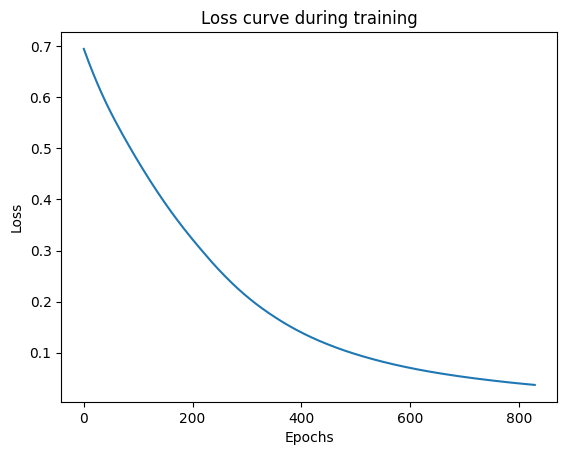

In [79]:
# Plotting accuracy score during training (optional)
plt.plot(mlp.loss_curve_)
plt.title('Loss curve during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [81]:
print(f"MLP Accuracy: {accuracy * 100:.2f}%")


MLP Accuracy: 100.00%


**Checking for overfitting!**

In [83]:
# 1. Cross-Validation:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the MLP model
cv_scores = cross_val_score(mlp, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [84]:
# 2. Regularization:
mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation='relu',
                    solver='adam',
                    max_iter=1000,
                    alpha=0.001,  # Regularization parameter (L2)
                    random_state=42)



The result cud be from the cross-validation scores — all being 1.0, and the mean cross-validation score being 1.0 — confirms that your MLP model is achieving 100% accuracy on all folds of the cross-validation process.

### **Learning Curves**
You can track and plot the loss for each fold during cross-validation to identify overfitting

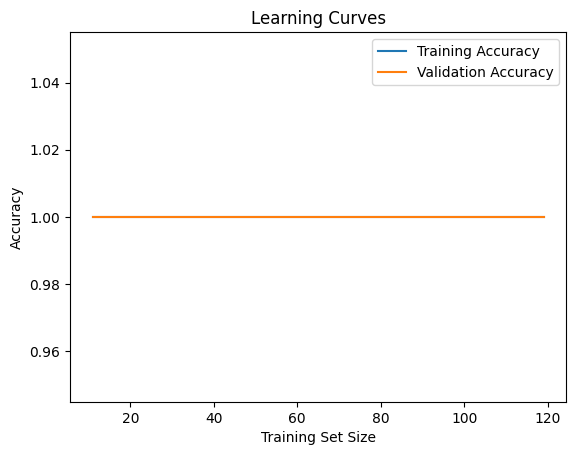

In [85]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


 This kind of graph suggests a few potential issues:

**Overfitting:** The model might be memorizing the data due to its complexity or the simplicity of the problem (Iris dataset). Overfitting usually occurs when the model performs well on the training data but struggles with new, unseen data. Since the accuracy is consistent at 100% on both the training and validation sets, it suggests that the model is memorizing the training data perfectly, but it may not generalize to other datasets.

**Easy Dataset:** The Iris dataset, especially with binary classification like setosa vs. others, is easy for models like MLPs to solve, resulting in 100% accuracy. However, this doesn't necessarily indicate that the model will perform well on more complex tasks.

**Lack of Regularization:** As mentioned earlier, overfitting might be caused by the lack of regularization (e.g., L2 regularization), which helps control the model’s complexity.